## Import Necessary Libraries

In [2]:
from urllib.request import urlopen
import json
import re
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import requests
import numpy as np
from sklearn import preprocessing
import time

# Declare Website URL
URL = 'http://redditmetrics.com/r/'

## Define Function
---
Input: a cryptocoin ticker (e.g. 'BTC', 'ETH', etc...)  
Output: three lists (dates, subscriber growth, and total subscribers)

In [3]:
# Input a coin and the past x days- return three lists: dates, subscriber growth, and total subscribers
def get_reddit_metrics_data(coin):
    temp = coin.replace(' ', '')
    
    url = URL + temp

    # Open url with urllib
    with urlopen(url) as url:
        web = url.read()

    # Create instance of soup and grab script tag containing data
    soup = BeautifulSoup(web, 'lxml')
    data = soup.find_all("script")[8].string
    data = data.split()

    # Parse Subscriber Growth Data
    sub_growth_start = data.index('element:')
    assert data[sub_growth_start + 1] == "'subscriber-growth',"
    sub_growth_end = data.index("pointSize:'',")
    subscriber_growth = data[sub_growth_start:sub_growth_end]

    ######################### SUBSCRIBER GROWTH DATA ###################
    # Parse Dates and return a list of dates
    date_pattern = re.compile("'\d{4}(?P<sep>[-/])\d{2}(?P=sep)\d{2}'")
    dates = list(filter(date_pattern.match, subscriber_growth))
    dates = [replace(x) for x in dates]
    dates = [datetime.strptime(x, '%Y-%m-%d') for x in dates]

    # Parse Values
    value_pattern = re.compile("\d*}")
    # print(subscriber_growth)
    subgrowth_values = list(filter(value_pattern.match, subscriber_growth))
    subgrowth_values = [replace(x) for x in subgrowth_values]
    subgrowth_values = list(map(int, subgrowth_values))
    
    ################ TOTAL SUBSCRIBERS ################
    # Get Total Subscribers data  
    data_1 = data[sub_growth_end+1:]
    total_sub_start = data_1.index('element:')
    assert data_1[total_sub_start + 1] == "'total-subscribers',"
    total_sub_end = data_1.index("pointSize:'',")
    total_subscribers = data_1[total_sub_start:total_sub_end]
    
    # Parse Values
    totalsubs_values = list(filter(value_pattern.match, total_subscribers))
    totalsubs_values = [replace(x) for x in totalsubs_values]
    totalsubs_values = list(map(int, totalsubs_values))

    return dates, subgrowth_values, totalsubs_values

## Define Functions to Replace/Preprocess Data and Graph Data

In [4]:
# Replace commas, quotes, and brackets with blanks
def replace(string): 
    x = string.replace(",", '')
    y = x.replace("'", '')
    z = y.replace("}", '')
    return z

# Graph Dates and Values Using Matplotlib
def graph(dates, values, title, xlabel, ylabel, pastxdays = 100):
    last_x_days_dates = dates[-pastxdays:]
    last_x_days_values = values[-pastxdays:]
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(last_x_days_dates, last_x_days_values)
    plt.show()

## Define Function to Grab Historical Prices From CryptoCompare API

In [5]:
# Get historical data
def historicalprices(ticker, currency='USD'):
        endpoint = requests.get('https://min-api.cryptocompare.com/data/histoday?aggregate=1&e=CCCAGG&extraParam'
                                '=CryptoCompare&fsym=' + ticker.upper() + '&limit=100000&tryConversion=false&tsym=' +
                                currency.upper())
        endpoint = endpoint.json()
        closeprice = [data['close'] for data in endpoint['Data']]
        closeprice = list(map(float, closeprice))
        time = [data['time'] for data in endpoint['Data']]
        time = [datetime.fromtimestamp(unixtime).strftime('%Y-%m-%d') for unixtime in time]
        time = [datetime.strptime(x, '%Y-%m-%d') for x in time]
        return time, closeprice

Nxt NXT


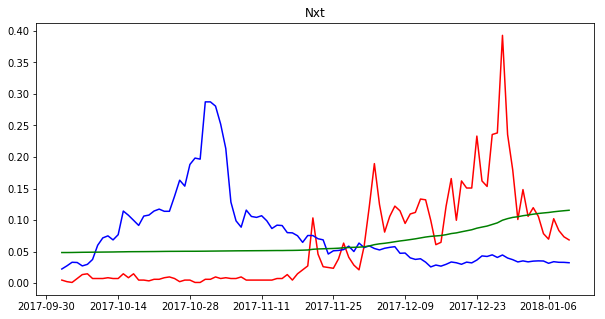

Ethereum Classic ETC


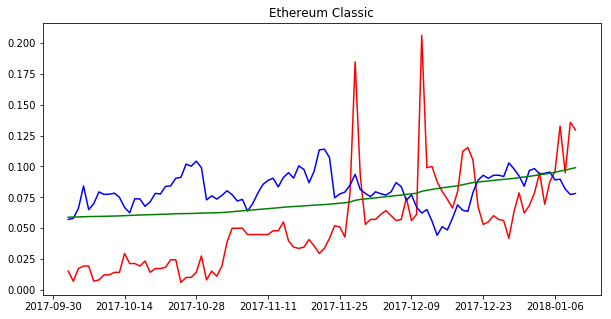

Dogecoin DOGE


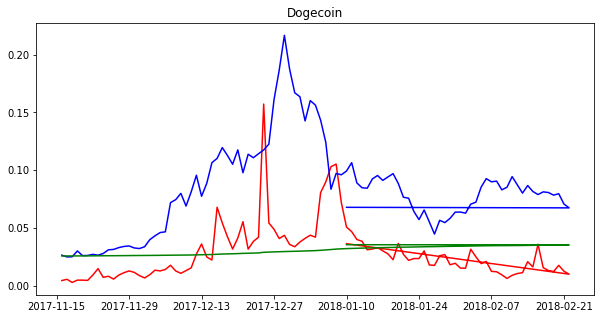

FAILED FOR: Bitcoin
Monero XMR


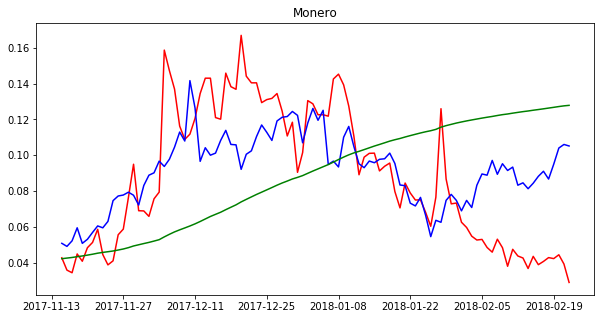

ZCash ZEC


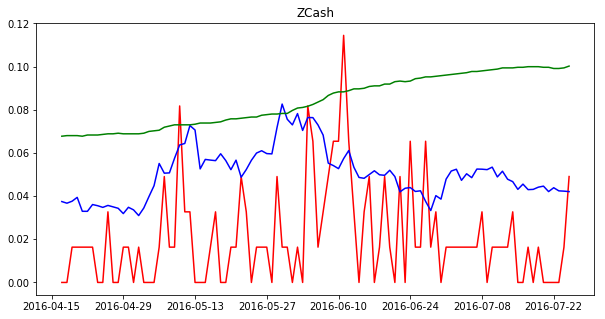

Litecoin LTC


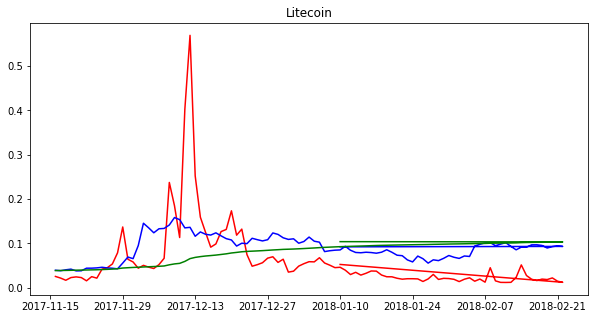

DigitalCash DASH


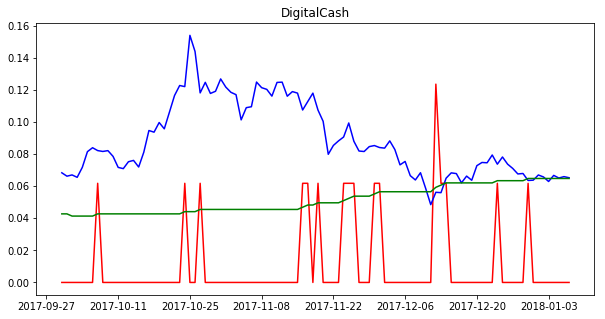

Bitshares BTS


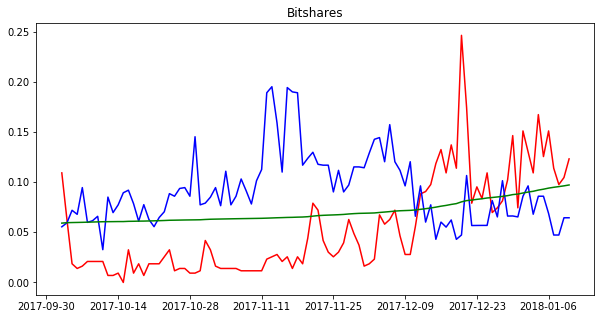

DigiByte DGB


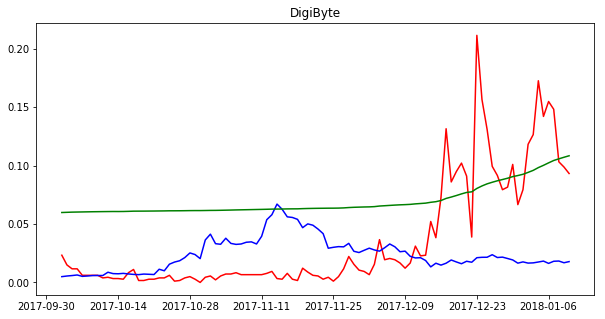

BitcoinDark BTCD
FAILED FOR: BitcoinDark
ProsperCoin PRC


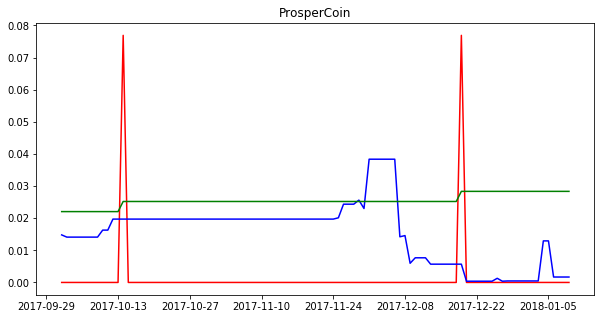

Bitstake XBS


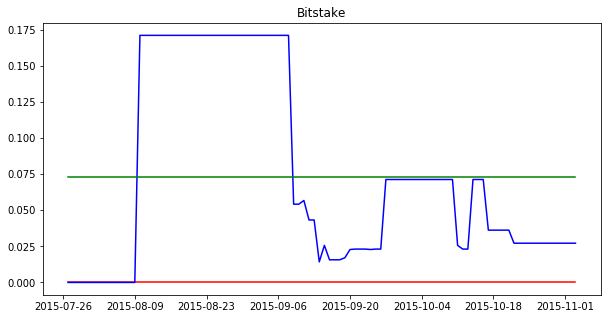

PayCoin PYC
FAILED FOR: PayCoin
CraigsCoin CRAIG
FAILED FOR: CraigsCoin
Ripple XRP


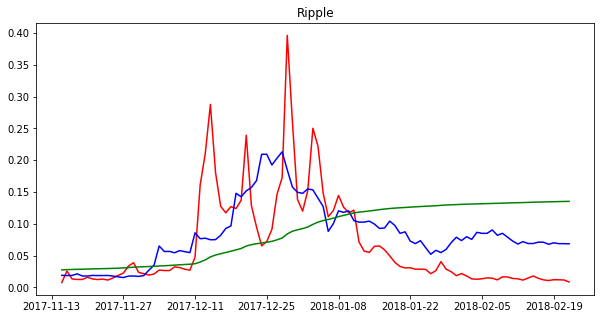

PeerCoin PPC


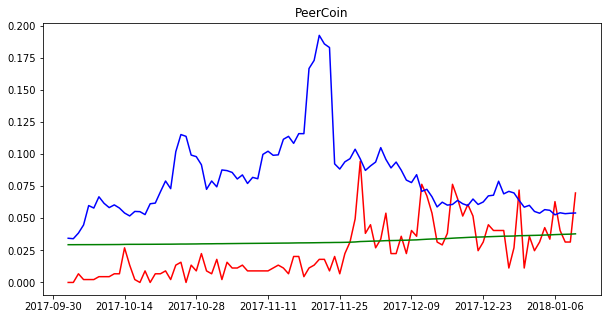

YbCoin YBC


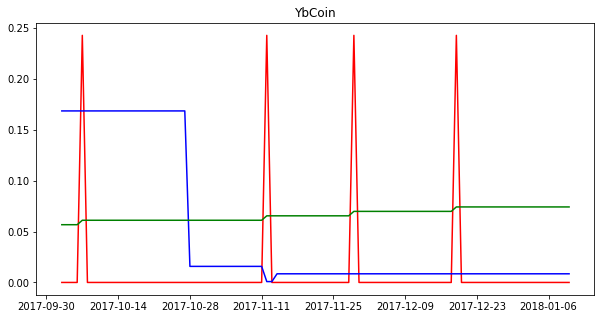

Ethereum ETH


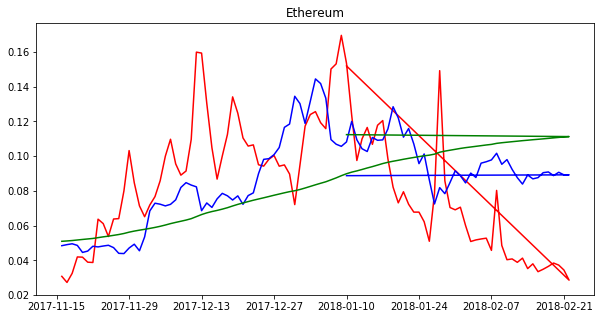

DarkKush DANK
FAILED FOR: DarkKush
DarkToken DT
FAILED FOR: DarkToken
CETUS Coin CETI
FAILED FOR: CETUS Coin
KoboCoin KOBO


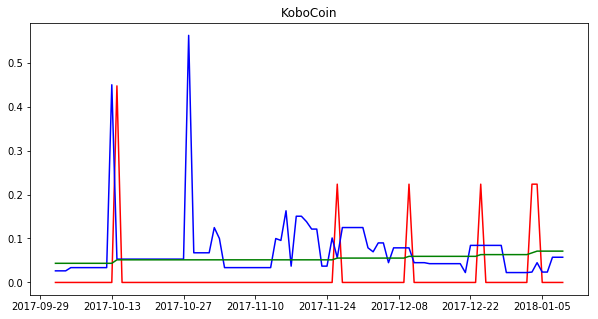

Supcoin SUP
FAILED FOR: Supcoin
PetroDollar XPD


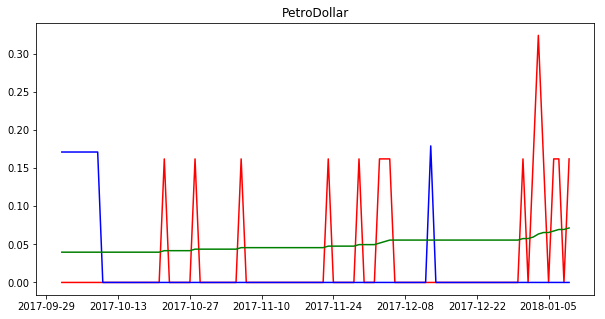

CleverHash CHASH
FAILED FOR: CleverHash
GiveCoin GIVE
FAILED FOR: GiveCoin
GeoCoin GEO


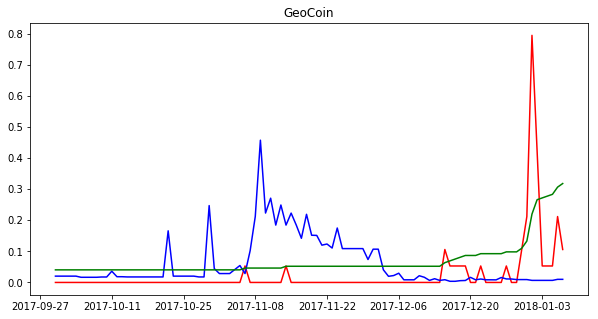

Spreadcoin SPR


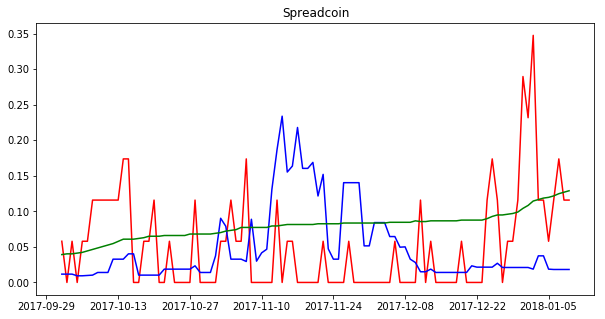

Insanity Coin WOLF
FAILED FOR: Insanity Coin
NXTI NXTI
FAILED FOR: NXTI
DogeParty XDP
FAILED FOR: DogeParty
ACoin ACOIN


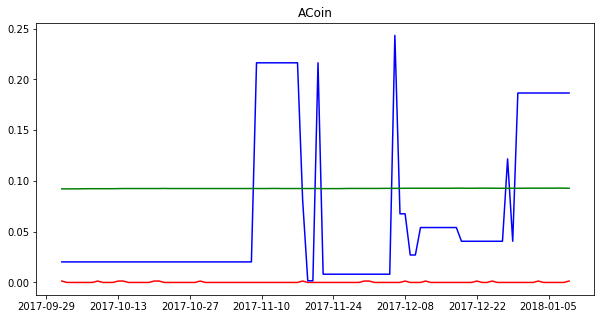

2015 coin 2015
FAILED FOR: 2015 coin
AlphaCoin ALF
FAILED FOR: AlphaCoin
Aero Coin AERO
FAILED FOR: Aero Coin
Aegis AGS
FAILED FOR: Aegis
AmericanCoin AMC
FAILED FOR: AmericanCoin
AlienCoin ALN
FAILED FOR: AlienCoin
ApexCoin APEX
FAILED FOR: ApexCoin
Argentum ARG
FAILED FOR: Argentum
ArchCoin ARCH
FAILED FOR: ArchCoin
Asia Coin AC
FAILED FOR: Asia Coin
AXRON AXR
FAILED FOR: AXRON
Aurora Coin AUR


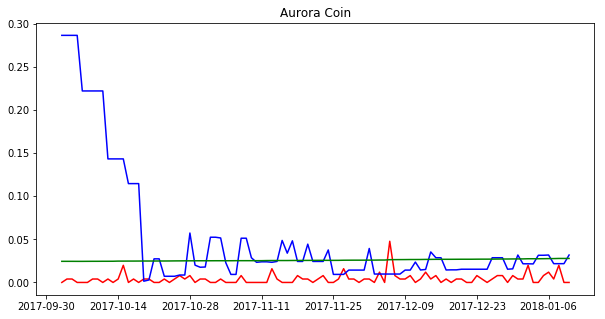

BattleCoin BCX
FAILED FOR: BattleCoin
Benjamins BEN
FAILED FOR: Benjamins


In [ ]:
if __name__ == "__main__":
    ### Name: Symbol
    coinlist = {}
    
    # MasterData.txt has dictionary of symbols, so we just extract the symbols from there
    # Store list of coins in 'names'
    json_data = json.load(open('MasterData.txt'))
    key = list(json_data.keys())[0]
    names = list(json_data[key].keys())
    
    # For each coin, try to get data, otherwise pass and continue
    try:
        for coin in names:
            coinlist[json_data[key][coin]['General']['CoinName']] = coin
    except:
        pass
    
    # See which coins have failed and maybe eliminate them next time
    failed = []
    
    # Plot data
    for coin in coinlist:
        try:
            time.sleep(3)
            print(coin, coinlist[coin])
            dates, subgrowth, totalsub = get_reddit_metrics_data(coin)
            _, closeprice = historicalprices(coinlist[coin], 'USD')
    #         print(closeprice)
    #         graph(dates, closeprice, coin, 'Date', 'Price', pastxdays = 100)

            normalized_subgrowth = preprocessing.normalize([subgrowth])
            normalized_price = preprocessing.normalize([closeprice])
            normalized_totalsub = preprocessing.normalize([totalsub])

            plt.figure(figsize=(10,5))
            plt.title(coin)
            plt.plot(dates[-100:], normalized_subgrowth[0][-100:], 'r')
            plt.plot(dates[-100:], normalized_price[0][-100:], 'b')
            plt.plot(dates[-100:], normalized_totalsub[0][-100:], 'g')
            plt.show()
        except:
            print('FAILED FOR: ' + coin)
            failed.append(coin)
            